# IMDB Top 20 Genre Word Cloud in the 2010s (2010 - 2019)

Let's see what's the popular genre in 2010s from the dataset: https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
imdb_df = pd.read_csv('IMDb movies.csv')

In [3]:
imdb_df.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000
mean,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989
std,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000
75%,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000


In [4]:
imdb_df.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [5]:
imdb_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [6]:
imdb_df['votes']

0         154
1         589
2         188
3         446
4        2237
         ... 
85850     398
85851     724
85852     265
85853     194
85854     102
Name: votes, Length: 85855, dtype: int64

### Take only 5 columns

In [7]:
columns = ['title','year','genre','avg_vote','votes']
# imdb_df_filtered = imdb_df[['']]
imdb_df_filtered = imdb_df[columns]

In [8]:
imdb_df_filtered.dtypes

title        object
year         object
genre        object
avg_vote    float64
votes         int64
dtype: object

## Pre-processing

Convert into numeric type for 'avg_vote','votes', and 'year' columns

In [9]:
imdb_df_filtered[['avg_vote','votes','year']] = imdb_df_filtered[['avg_vote','votes','year']].apply(pd.to_numeric, errors='coerce')

# drop na to remove 1 row that have nonvalid value
imdb_df_filtered.dropna(inplace=True)

In [10]:
imdb_df_filtered['year'] = imdb_df_filtered['year'].astype('int64')

In [11]:
imdb_df_filtered.dtypes

title        object
year          int64
genre        object
avg_vote    float64
votes         int64
dtype: object

Take a peek for year 2020 with query function

In [12]:
imdb_df_filtered.query('year == 2020')

,title,year,genre,avg_vote,votes
51533,Road to Red,2020,"Action, Adventure, Horror",4.2,472
52039,Fantasy Island,2020,"Action, Adventure, Fantasy",4.9,26823
52245,The Rental,2020,"Horror, Thriller",5.7,9453
52271,Seeru,2020,"Action, Drama",5.4,224
52272,Love Aaj Kal,2020,"Drama, Romance",5.0,6292
...,...,...,...,...,...
85836,Min pappa Marianne,2020,"Comedy, Drama",7.2,545
85839,Coffee & Kareem,2020,"Action, Comedy",5.1,10627
85846,Enemy Lines,2020,War,5.0,764
85850,Le lion,2020,Comedy,5.3,398


In [13]:
imdb_df_filtered_backup = imdb_df_filtered.copy()

In [14]:
# imdb_df_filtered = imdb_df_filtered_backup.copy()

In [15]:
imdb_df_filtered_all = imdb_df_filtered.copy()

## Transform the genre column value into a list of genres

In [16]:
imdb_df_filtered['genre'] = imdb_df_filtered['genre'].apply(lambda x: list(map(str.lstrip,x.split(','))))
imdb_df_filtered_all['genre'] = imdb_df_filtered_all['genre'].apply(lambda x: list(map(str.lstrip,x.split(','))))

In [20]:
imdb_df_filtered['genre']

0                          [Romance]
1          [Biography, Crime, Drama]
2                            [Drama]
3                   [Drama, History]
4        [Adventure, Drama, Fantasy]
                    ...             
85850                       [Comedy]
85851                [Comedy, Drama]
85852                        [Drama]
85853                [Drama, Family]
85854                        [Drama]
Name: genre, Length: 85854, dtype: object

In [18]:
imdb_df_filtered['votes'].describe().apply("{0:.2f}".format)

count      85854.00
mean        9493.32
std        53574.65
min           99.00
25%          205.00
50%          484.00
75%         1766.00
max      2278845.00
Name: votes, dtype: object

Filter based on upper quartile conditions for 'decent' movies

In [21]:
imdb_df_filtered = imdb_df_filtered.query('avg_vote >= 6.8 and votes >= 1766')

In [22]:
base_year = 2010
final_year = base_year + 10

In [23]:
genreCounter = defaultdict(int)
genreCounterAll = defaultdict(int)

In [24]:
def countGenres(genreCounter,x):
    for genre in x:
        genreCounter[genre] += 1

In [25]:
imdb_df_filtered.query('year >= {base} and year < {thresh}'.format(base = base_year, thresh = final_year))['genre'].apply(lambda x : countGenres(genreCounter,x))

15675    None
41749    None
43351    None
43822    None
44619    None
         ... 
85757    None
85761    None
85780    None
85803    None
85843    None
Name: genre, Length: 2398, dtype: object

In [26]:
Counter(genreCounter).most_common(10)

[('Drama', 1813),
 ('Comedy', 683),
 ('Action', 536),
 ('Romance', 395),
 ('Crime', 390),
 ('Thriller', 335),
 ('Adventure', 295),
 ('Biography', 294),
 ('Animation', 163),
 ('Mystery', 159)]

In [27]:
imdb_df_filtered_all.query('year >= {base} and year < {thresh}'.format(base = base_year, thresh = final_year))['genre'].apply(lambda x : countGenres(genreCounterAll,x))

15675    None
25479    None
32465    None
33030    None
33800    None
         ... 
85848    None
85849    None
85852    None
85853    None
85854    None
Name: genre, Length: 28537, dtype: object

In [28]:
Counter(genreCounterAll).most_common(10)

[('Drama', 15513),
 ('Comedy', 9371),
 ('Thriller', 4973),
 ('Action', 4424),
 ('Horror', 4103),
 ('Romance', 3882),
 ('Crime', 2869),
 ('Adventure', 2107),
 ('Mystery', 1876),
 ('Family', 1437)]

The frequency of each genre from the filtered dataset is divided by the total frequency of that genre from the unfiltered dataset. 
It simply means, the probability of a better rated movie is proportional to the size of the genre in the word cloud.

In [29]:
for genre in genreCounter:
    genreCounter[genre] /= genreCounterAll[genre]

In [32]:
genreCounter

defaultdict(int,
            {'Drama': 0.11686972216850383,
             'Action': 0.12115732368896925,
             'Crime': 0.13593586615545486,
             'Comedy': 0.07288443069042791,
             'Fantasy': 0.08006672226855713,
             'Adventure': 0.1400094921689606,
             'Sci-Fi': 0.06461780929866036,
             'Mystery': 0.0847547974413646,
             'Animation': 0.16752312435765673,
             'Biography': 0.3072100313479624,
             'History': 0.17300131061598953,
             'War': 0.17215189873417722,
             'Romance': 0.10175167439464193,
             'Sport': 0.15508021390374332,
             'Thriller': 0.06736376432736779,
             'Family': 0.06402226861517049,
             'Horror': 0.02096027297099683,
             'Music': 0.15192743764172337,
             'Western': 0.07407407407407407,
             'Musical': 0.07692307692307693})

Most common genre

In [33]:
Counter(genreCounter).most_common(10)

[('Biography', 0.3072100313479624),
 ('History', 0.17300131061598953),
 ('War', 0.17215189873417722),
 ('Animation', 0.16752312435765673),
 ('Sport', 0.15508021390374332),
 ('Music', 0.15192743764172337),
 ('Adventure', 0.1400094921689606),
 ('Crime', 0.13593586615545486),
 ('Action', 0.12115732368896925),
 ('Drama', 0.11686972216850383)]

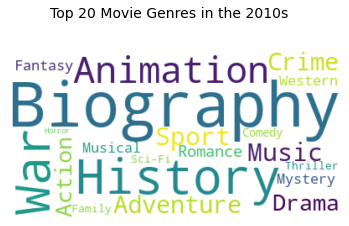

In [34]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=20, background_color="white", random_state=50).generate_from_frequencies(genreCounter)

# Display the generated image:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

plt.imshow(wordcloud, interpolation='bilinear')
plt.suptitle('Top 20 Movie Genres in the 2010s', size=14, y=0.95)

plt.axis("off")
plt.savefig('movie-wordcloud.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.2)
plt.show()